### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 다항식 회귀 (1차원)

In [125]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [126]:
'''
a = np.random.uniform(-5,5,size=[1000])
X = np.c_[a,a**2]
# y = 3 + 2*a + a**2 + np.random.normal(0,3,size=len(a))
y = 3 + 2*a + a**2 + np.random.randn(len(a))*a
'''

iris = load_iris()
col1 = 0
col2 = 3

ndim = 10

X0 = iris.data[:,col1]
X = np.array([X0**i for i in range(1,ndim+1)]).T
y = iris.data[:,col2]

# X = np.c_[iris.data[:,0],iris.data[:,0]**2,iris.data[:,0]**3]
# y = iris.data[:,2]

In [127]:
model = LinearRegression()
model.fit(X,y) # reshape() 함수에 주의

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('b =',b,'\nw =',w)

b = 133246.22035995594 
w = [-7.70648970e+04 -5.83232123e+04  8.00143000e+04 -3.95858298e+04
  1.12076396e+04 -2.01173153e+03  2.34047189e+02 -1.71832669e+01
  7.25976009e-01 -1.34859120e-02]


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


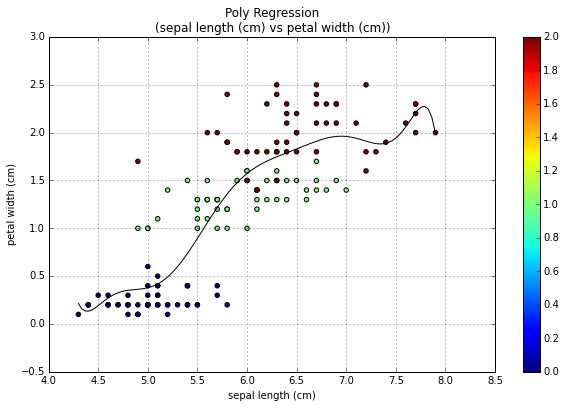

In [128]:
fig=plt.figure(figsize=(10,6))
plt.title('Poly Regression\n(%s vs %s)' %(iris.feature_names[col1],iris.feature_names[col2]))

plt.scatter(X[:,0], y, c=iris.target)
plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar()

xs = np.linspace(X[:,0].min(),X[:,0].max(),100)
ys = b
for i in range(ndim):
    ys += (xs**(i+1))*w[i]

plt.plot(xs, ys, 'k-')
#plt.text(0,3,'coef: %f\nintercept: %f' % (w,b), va='top', fontsize=15,color='b')
# plt.axis('equal')
plt.grid()

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


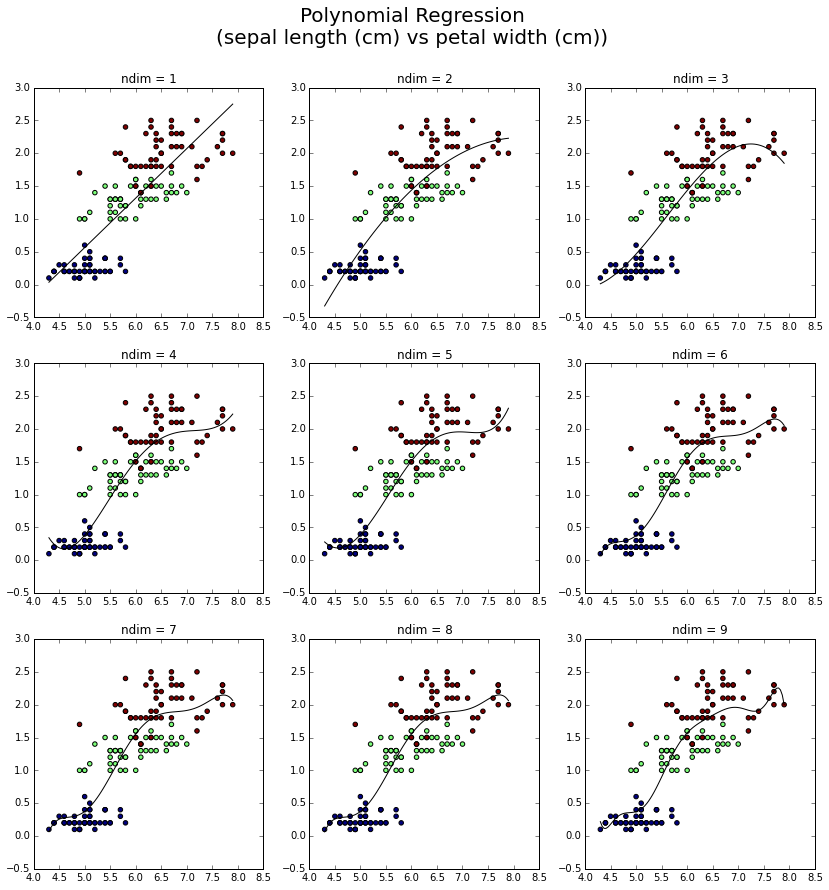

In [142]:
iris = load_iris()

col1 = 0
col2 = 3

fig = plt.figure(figsize=[14,14])
fig.suptitle('Polynomial Regression\n(%s vs %s)' % (iris.feature_names[col1],iris.feature_names[col2]),
            fontsize=20)

for ndim in range(1,10):
    plt.subplot(3,3,ndim)
    plt.title('ndim = %d' % ndim)

    ##### make polynomial data #####
    X0 = iris.data[:,col1]
    if ndim==1 :
        X = X0.reshape(-1,1)
    else :
        X = np.array([X0**i for i in range(1,ndim+1)]).T
    y = iris.data[:,col2]

    ##### make linear model #####
    model = LinearRegression()
    model.fit(X,y) # reshape() 함수에 주의

    w = model.coef_ # 기울기
    b = model.intercept_ # y 절편

    ##### draw IRIS samples #####
    plt.scatter(X[:,0], y, c=iris.target)

    ##### draw result curve #####
    xs = np.linspace(X[:,0].min(),X[:,0].max(),100)
    ys = b
    
    for i in range(ndim):
        ys += (xs**(i+1))*w[i]

    plt.plot(xs, ys, 'k-')

- from sklearn.preprocessing import PolynomialFeatures 참조
- 교재 4장 274쪽 참조